# Activation Functions

Activation functions are the functions used in neural networks to compute the weighted sum of input and biases, which are used to decide if a specific  neuron can be fired or not. It manipulates the presented data through some gradient processing usually *gradient descent* and afterwards produce an output for the neural network  containing the parameters in the data. 

In certain literatures, these **Activation functions** are often referred to as a **Transfer Function(s)**.

## Sigmoid Function

Standard sigmoid function for independent variable `x` is defined as below:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Derivative of the sigmoid function with respect to `x` is given as below:

$$\frac{d}{dx}(\sigma(x)) = \sigma(x)(1 - \sigma(x))$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn plotting style
sns.set_style('darkgrid')

In [2]:
# sigmoid function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

# derivative of sigmoid function
def derivative_of_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

### Plot the data for sigmoid and it's derivative.

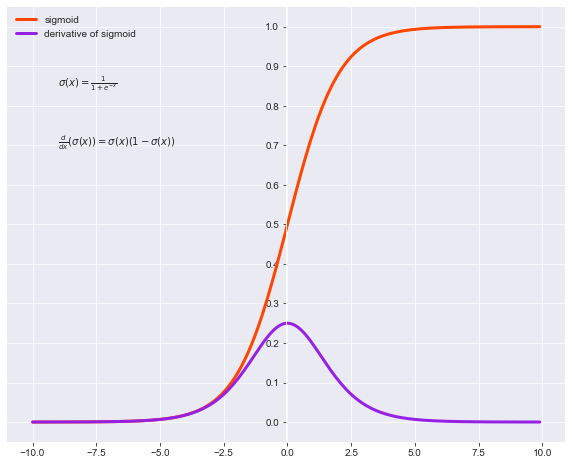

In [3]:
x = np.arange(-10., 10., 0.1)
y = sigmoid(x)
ds = derivative_of_sigmoid(x)

fig, axes = plt.subplots(figsize=(10, 8))
axes.spines['left'].set_position('center')
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.xaxis.set_ticks_position('bottom')
axes.yaxis.set_ticks_position('left')
axes.set_yticks(np.arange(0.0, 1.1, 0.1))

axes.plot(x, y, color='#FF4500', linewidth=3, label='sigmoid')
axes.text(-9.0,0.85, r'$\sigma(x) = \frac{1}{1 + e^{-x}}$')
axes.plot(x, ds, color='#9621E2', linewidth=3, label='derivative of sigmoid')
axes.text(-9.0,0.70, r'$\frac{d}{dx}(\sigma(x)) = \sigma(x)(1 - \sigma(x))$')
axes.legend(loc='upper left', frameon=False)

## Effect of weights and bias on the function output

Changing the input weight changes the slope of the output sigmoid activation function, which can be demonstrated as below.

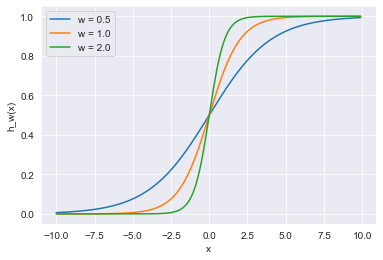

In [10]:
w1 = 0.5
w2 = 1.0
w3 = 2.0

t1 = 'w = 0.5'
t2 = 'w = 1.0'
t3 = 'w = 2.0'

for w, t in [(w1, t1),(w2, t2),(w3, t3)]:
    f = 1 / (1 + np.exp(-x * w))
    plt.plot(x, f,  label=t)
    
plt.xlabel('x')
plt.ylabel('$h_w(x)$')
plt.legend(loc=2)
plt.show()

Changing bias, we can the node simulate a generic if condition (`if (a > b) then 1 else 0`) as follows

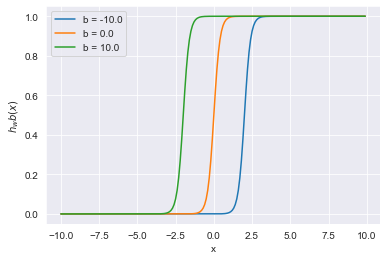

In [12]:
w = 5.0

b1 = -10.0
b2 = 0.0
b3 = 10.0

t1 = 'b = -10.0'
t2 = 'b = 0.0'
t3 = 'b = 10.0'

for b, t in [(b1, t1),(b2, t2), (b3, t3)]:
    f = 1 / (1 + np.exp(-(w * x + b)))
    plt.plot(x, f, label=t)
plt.xlabel('x')
plt.ylabel('$h_wb(x)$')
plt.legend(loc=2)
plt.show()

### Hyperbolic Tangent function

The `tanh` which is hyperbolic tangent function became the preferred function compared to the `sigmoid` function in that it gives better training performance for multi-layer neural networks. 

However, the *tanh* function could not solve the *vanishing gradient problem* suffered by the sigmoid functions. But, the main advantage provided by the tanh function over sigmoid is that it produces zero centred output thereby aiding the back-propagation process.

A property of the `tanh` function is that it can only attain a gradient of `1`, only when the value of the input is `0`. That is when *x* is `zero`. 

This makes the tanh function produce some dead neurons during computation. The dead or the dying neuron problem is a condition where the activation weight ir rarely used as a result of zero gradient. This limitation of the tanh function spurred further research in the area of activation functions to resolve the problem, there by giving birth to the __Rectified linear Unit (ReLU)__ activation function.

The tanh function have been used mostly in the Recurrent Neural Networks (*RNN*) for natural language processing and speech recognition tasks 

Mathematically, the `tanh` activation function described as below

$$\tanh(x)=\frac{e^{x} - e^{-x}}{2}$$

and it's derivative is

$$\frac{d}{dx}(tanh(x)) = 1 - tanh^2{(x)}$$

In [5]:
def tanh(x):
    l = np.exp(x)
    r = np.exp(-x)
    return (l - r) / (l + r)

def derivative_of_tanh(x):
    return 1 - (tanh(x))**2

Plotting the data for tanh and it's derivative

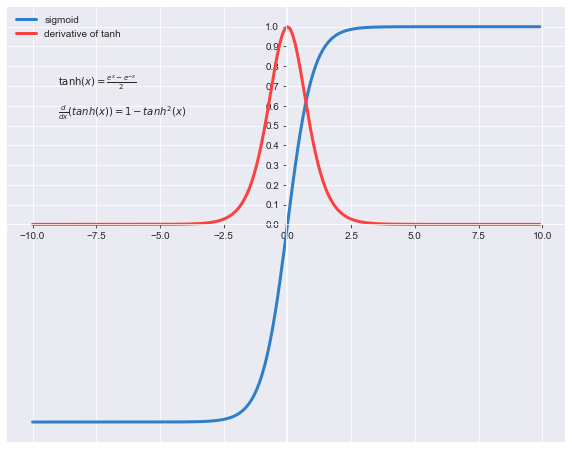

In [6]:
t = tanh(x)
dt = derivative_of_tanh(x)

fig, axes = plt.subplots(figsize=(10, 8))
axes.spines['left'].set_position('center')
axes.spines['bottom'].set_position('center')
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.xaxis.set_ticks_position('bottom')
axes.yaxis.set_ticks_position('left')
axes.set_yticks(np.arange(0.0, 1.1, 0.1))

axes.plot(x, t, color='#307EC7', linewidth=3, label='sigmoid')
axes.text(-9.0,0.7, r'$\tanh(x)=\frac{e^{x} - e^{-x}}{2}$')
axes.plot(x, dt, color='#FF4040', linewidth=3, label='derivative of tanh')
axes.text(-9.0,0.55, r'$\frac{d}{dx}(tanh(x)) = 1 - tanh^2{(x)}$')
axes.legend(loc='upper left', frameon=False)

### Rectified Linear Unit (ReLU)

A `rectified linear unit` does simply `max(0,x)`. It is the one of the most popular choices for activation functions of neural network units.

Mathematically, it's representated as below

$$
f(x) =
  \begin{cases}
    0  & \quad \text{for } x < \text{0}\\
    x  & \quad \text{for } x \geq \text{0}
  \end{cases}
$$

It takes a real value as input. The output is x, when x > 0 and is 0, when x < 0. It is mostly preferred over _sigmoid_ and _tanh_.
**ReLU** addresses the **vanishing gradient problem** of *sigmoid / hyperbolic tangent* units, thus allowing for efficient gradient propagation in deep networks. The range of relu is from 0 to $\infty$

- Derivative of ReLU

Derivative of ReLU is defined as below:

$$
\frac{d}{dx}f(x) = 
  \begin{cases}
    0  & \quad \text{for } x < \text{0}\\
    1  & \quad \text{for } x \geq \text{0}
  \end{cases}
$$

- Plotting the ReLU and it's derivative

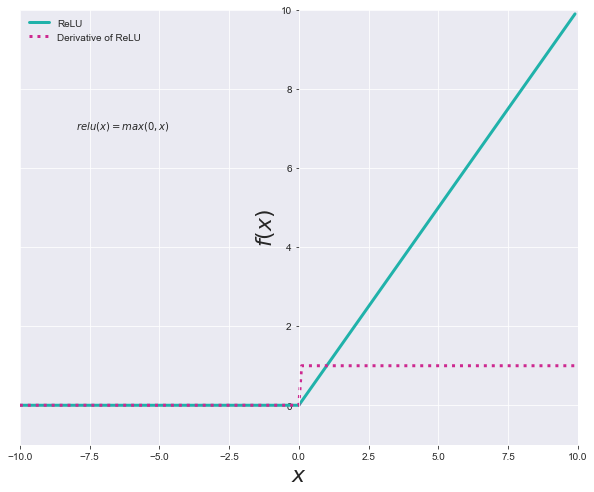

In [7]:
# rectified linear function
def relu(x):
    """ReLU returns 1 if x>0, else 0."""
    return np.maximum(0.0, x)

def relu_prime(z) :
    """ Returns the derivative of the ReLU function. """
    return 1*(z>=0)

r = relu(x)
dr = relu_prime(x)

fig, axes = plt.subplots(figsize=(10, 8))
axes.spines['left'].set_position('center')
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.xaxis.set_ticks_position('bottom')
axes.yaxis.set_ticks_position('left')

axes.set_xlabel('$x$', fontsize=22)
axes.set_ylabel('$f(x)$', fontsize=22)

axes.set_xlim(-10,10)
axes.set_ylim(-1,10)

axes.plot(x, r, color='#20B2AA', linewidth=3, label='ReLU')
axes.text(-8.0,7.0, r'$relu(x)=max(0, x)$')
axes.plot(x, dr, color='#CD2990',linestyle='dotted', linewidth=3, label='Derivative of ReLU')
axes.legend(loc='upper left', frameon=False)

## Softmax

Softmax is another popular activation function used in neural computing. It's more specifically used at the output layer of a convolutional neural network.

Softmax normalizes the input array into a scale of `[0, 1]`.

The function transforms the `logits` (_un-activated output of a layer of nodes_) into a quasi-probability (i., the sum of all the output nodes is equal to 1).

Softmax essentially consists of computing the probability distribution from a vector of real numbers. The function produces an output which is a range of values between 0 and 1 where the total sum equals to 1. Since it produces multiple values of probabilities with each value assigned to a different output class, the function is used as an activation function for multiclass classification.

The main difference between `Softmax` and `Sigmoid` is that the _sigmoid_ is used in binary classification (with output of 0 and 1 or -1 & 1 etc.) while _softmax_ is used for multivariate or multiclass classification tasks.

Mathematically, its defined as below:

$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{k=1}^{K} e^{z_j}} \\
where \\
z_j = w_j^{T}.x_j
$$

### Implementation in python

Below are two implementations of the softmax, one is a direct one which we may consider as a naive implementation and the other a stable version. The stable version is the one which can be used as essentially it counteracts the `NaN` values reported for values falling beyond the mathematical range of `numpy`.

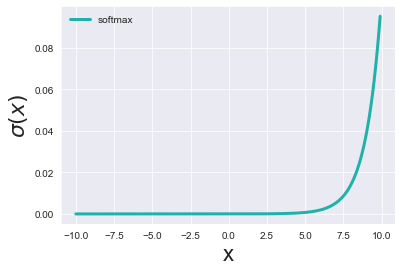

In [8]:
def naive_softmax(z):
    exps = np.exp(z)
    return exps / np.sum(exps)

def softmax(z):
    exps = np.exp(z - max(z))
    return exps / np.sum(exps)

z = softmax(x)

plt.xlabel('x', fontsize=22)
plt.ylabel('$\sigma(x)$', fontsize=22)
plt.plot(x, z, color='#20B2AA', linewidth=3, label='softmax')
plt.legend(loc='upper left', frameon=False)

### 3-dimensional projection of the softmax

Text(0, 0.5, '$P(t=1|\\mathbf{z})$')

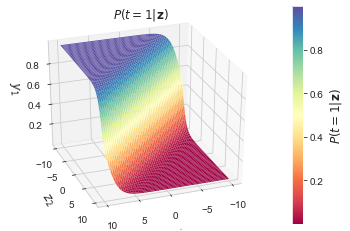

In [9]:
# for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

#
# define a vector for weights, for which the output will be plotted
nb_of_zs = 200
# set random input(s) for z
zs = np.linspace(-10, 10, num=nb_of_zs) 
# create a meshgrid for plot
zs_1, zs_2 = np.meshgrid(zs, zs)
# now initialize the output (size = 200 X 200 X 2)
y = np.zeros((nb_of_zs, nb_of_zs, 2))

# initialize the output matrix for each combination of the input z's
for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = softmax(np.asarray([zs_1[i,j], zs_2[i,j]]))

# plot the surface of loss function for both the classes
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(6,4))
    # Plot the loss function surface for t=1
    ax = fig.gca(projection='3d')

surf = ax.plot_surface(zs_1, zs_2, y[:,:,0], linewidth=0, cmap=plt.get_cmap('Spectral'))
ax.view_init(elev=30, azim=70)
cbar = fig.colorbar(surf)
ax.set_xlabel('$z_1$', fontsize=2)
ax.set_ylabel('$z_2$', fontsize=12)
ax.set_zlabel('$y_1$', fontsize=12)
ax.set_title ('$P(t=1|\mathbf{z})$')
cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=12)